# Modelagem direta de relevo do embasamento  (RAO et al., 1994)

In [1]:
# importando pacotes necessarios:
import numpy as np # pacote numerico
import pylab as py 
import matplotlib.pyplot as plt # pacote de plotagem
from matplotlib import widgets
from matplotlib.path import Path
from matplotlib.patches import PathPatch
%matplotlib tk

# Importando pacotes externos:

In [2]:
from modules.iplots import pick_points, model_masses # para fazer o plot interativo
from modules.gravity import grav2D_anom, g_sphere # funcao que calcula dados de gravidade (rao 1994)

# Definicao das coordenadas do modelo interpretativo:


In [8]:
area= []
xmin = -1000.0
xmax = +1000.0
xobs = np.linspace(xmin, xmax, 100, endpoint=True)
zmin = -25.0
zmax = 3.5        # profundidade da bacia em km (entradas do rao et al., 1994 em Km)
zmax = 3500.0     # adaptado para metros !
print(zmin)
area = [xmin, xmax, zmin, zmax]
print(area)

-25.0
[-1000.0, 1000.0, -25.0, 3500.0]


In [30]:
# chamando a funcao que desenha o relevo do embasamento:
%matplotlib tk 
axes = plt.figure().add_subplot(1,1,1)
xv,zv = pick_points(area, axes, marker='o', color='k', size=8, xy2ne=False)

# Simulação da compactação usando Rao et al, 1994:

In [31]:
# info da propriedade fisica:
delta_rho = -1.10 #(g/cm³)# contraste de Densidade do arenito em relacao ao embasamento local no topo da bacia!
beta = 7.12
# convertendo para SI(kg/m³):
rho_ref = 2.88 # densidade do embasamento (checar!)
rho = delta_rho + rho_ref
#rho = rho * 1000.0 
print('densidade no topo da bacia em g/cm³=', rho)

densidade no topo da bacia em g/cm³= 1.7799999999999998


# Cálculo da Anomalia gravimétrica produzida pela bacia modelada:

In [32]:
nv = np.size(xv)
#print nv
nper = np.size(xobs)
#print nper
# calculo da anomalia grav atraves de rao1994:
xd = np.zeros( (nv,) )
zd = np.zeros( (nv,) )
grav = np.zeros( (nper,) )
for i in range(nper):
    for j in range(nv):
        xd[j] = ( xv[j] - xobs[i])/1000.0
        zd[j] = (zv[j]- zmin)/1000.0
    # chamando a funcao do rao 1994:
    grav[i] = grav2D_anom(xd,zd,delta_rho,beta)

# Calculo da densidade em função da profundidade (RAO, 1994):

In [33]:
#######################################################
# computing hyperbolic density function
########################################################
z = np.linspace( np.amin(zv), np.amax(zv), np.size(zv) ) # em km
rhoz = np.zeros( np.size(z) )
rhoz = (delta_rho)*beta**2/(beta + (z/100.0) )**2 # conversao para g/cm3 (CORRETO!!!!)
#rhoz = rhoz + 2.670

# Gráfico:

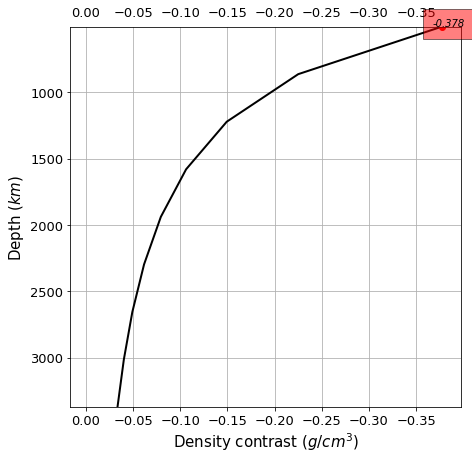

In [34]:
%matplotlib inline
# plot of the density distribution:
fig = plt.figure(figsize=(7,7))

# definition of fontsize:
fs = 15 
# invert axis
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# set labelsize 
plt.tick_params(axis='y', labelsize=fs-2)
plt.tick_params(axis='x', labelsize=fs-2,labelbottom=True,labeltop=True)

plt.text(rhoz[0]+0.01, z[0]+0.148, str( format(rhoz[0],'.3f') ), style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

plt.plot(rhoz,z,'k-',linewidth=2.0)
plt.plot(rhoz[0],z[0],'ro',linewidth=2.0)
plt.grid()
plt.xlabel(r'Density contrast $(g/cm^3)$',fontsize=fs)
plt.ylabel(r'Depth $(km)$',fontsize=fs)
plt.axis([np.max(rhoz)+0.05, np.min(rhoz)-0.02, np.max(z)+0.1, np.min(z)-0.1])
#plt.savefig(caminho +'.png', dpi=300, transparent=True, bbox_inches="tight" )
plt.show()
#############################################################################################################

In [35]:
# get the number of elements of xv (number of vertices of the polygon)
n = np.size(xv)     
# create new working arrays for the vertices of a closed polygon:
x = np.zeros( (n+1,) )  
z = np.zeros( (n+1,) ) 
x[0:n] = xv
z[0:n] = zv
# GAMBIARRA PARA PLOT DE CORES ASSSOCIADOOS À BACIA MODELADA (PENSAR EM ALGO MILHÓ) 
x[n:n+1] = min(xv)
z[n:n+1] = np.min(zv)

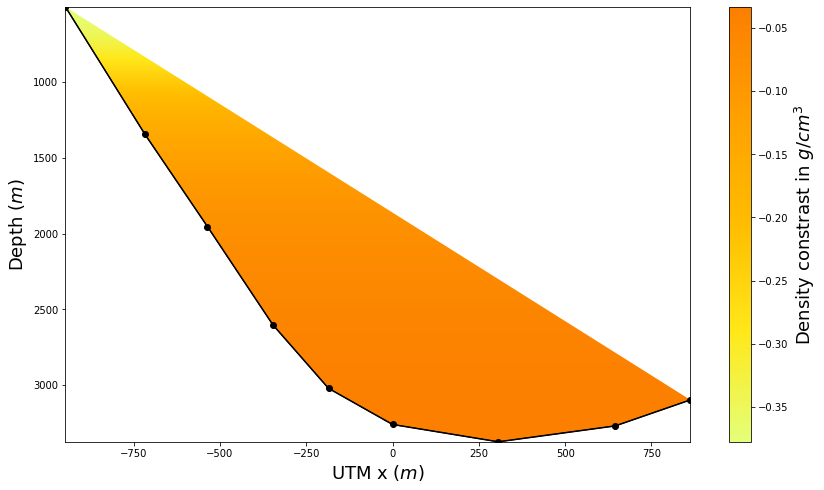

In [36]:
# and the modeled basin:
fig = plt.figure(figsize=(14,8))
path = Path(np.array([x,z]).T)
patch = PathPatch(path, facecolor='none')

#######################################################
plt.gca().add_patch(patch)
plt.plot(xv,zv,'k-o')

# plot the last and the first corner to close up the polygon:
fs = 18 # font size for the label
plt.gca().invert_yaxis()
plt.xlabel(r'UTM x $(m)$',fontsize=fs)
plt.ylabel(r'Depth $(m)$',fontsize=fs)
plt.xlim([np.min(xv), np.max(xv)])

##################################################################
# plot the density variation together with the basin:
##################################################################

im = plt.imshow(rhoz.reshape(np.size(zv),1),  cmap=plt.cm.Wistia,interpolation="bicubic",
                origin='lower',extent=[min(x), max(x), min(z), max(z)],aspect="auto", clip_path=patch, clip_on=True)
#im.set_clip_path(patch)

# OBS:::::: para reverter a escala de cores, basta um simples "_r" ! sucesso de vida!!!!
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'Density constrast in $g/cm^3$', fontsize=fs)

# Mat, verificar!!!!!!
#plt.savefig(caminho +".png", dpi=300, transparent=True, bbox_inches='tight')
plt.show()